# In ‘Course_page_actions.csv’ dataset
Test that average duration for the group experiment is
bigger than the average duration in group control

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [2]:
obs_diff=df[df.group=='experiment'].duration.mean()-df[df.group=='control'].duration.mean()
obs_diff

15.537053609623726

In [3]:
df.shape

(4069, 5)

(array([2.000e+00, 2.200e+01, 1.730e+02, 8.310e+02, 2.220e+03, 3.202e+03,
        2.369e+03, 9.570e+02, 2.070e+02, 1.700e+01]),
 array([ 5.17451331,  7.04130072,  8.90808813, 10.77487554, 12.64166295,
        14.50845036, 16.37523777, 18.24202518, 20.10881259, 21.9756    ,
        23.84238741]),
 <a list of 10 Patch objects>)

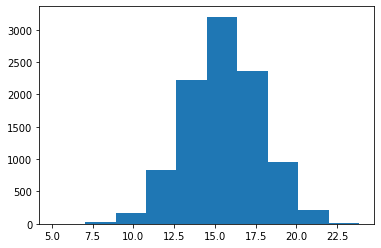

In [4]:
diff=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].duration.mean()-sample[sample.group=='control'].duration.mean())
plt.hist(diff)
    

(array([  18.,  108.,  611., 1807., 2907., 2702., 1409.,  366.,   69.,
           3.]),
 array([-8.65538239, -6.87182051, -5.08825863, -3.30469675, -1.52113486,
         0.26242702,  2.0459889 ,  3.82955078,  5.61311267,  7.39667455,
         9.18023643]),
 <a list of 10 Patch objects>)

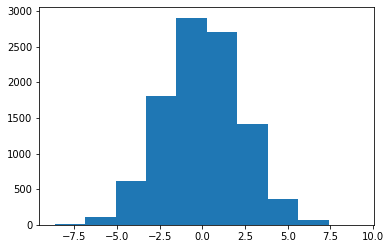

In [5]:
diff=np.array(diff)
null=np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

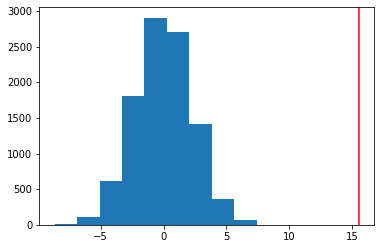

In [6]:
plt.hist(null)
plt.axvline(x=obs_diff,c='red')

In [7]:
(null>obs_diff).mean()

0.0